In [42]:
from convertToCSV import convert
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

RSEED = 9

nomeArquivo = "selfie_dataset"

convert(nomeArquivo)
df = pd.read_csv("../" + nomeArquivo + ".csv")
df.pop('NOME')


Y_conj = np.array(df.pop('PONTOS_POPULARIDADE'))
X_conj = df

colunas = df.head()  

bins = np.linspace(1.0, 7.0, num=47)
Y_binned = np.digitize(Y_conj, bins)

# X = data, Y = target
X_train, X_test, Y_train, Y_test = train_test_split(X_conj,
                                     Y_conj, 
                                     stratify = Y_binned,
                                     test_size = 0.3, 
                                     random_state = RSEED)



sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

rg = RandomForestRegressor(n_estimators=500, random_state=RSEED)
print("Treinando... com", rg.__class__.__name__)
rg.fit(X_train, Y_train)
predicts = rg.predict(X_test)
errors = abs(predicts - Y_test)
# print(rg.feature_importances_)

# Accuracy
mape = 100 * (errors / Y_test)
accuracy = 100 - np.mean(mape)
print("Accuracy: {0:.2f}%".format(accuracy))
# print("Predicoes: ", predicts)
# print("Errors: ", errors)
# print("Score: ", rg.score(X_test, Y_test))

importances = list(zip(rg.feature_importances_, colunas))
importances.sort(reverse=True)

for importancia, nome in importances:
    print("Importancia: {0: <10.3} | {1}".format(importancia, nome))


Treinando... com RandomForestRegressor
Accuracy: 88.36%
Importancia: 0.0588     | WHITE
Importancia: 0.0502     | SMILING
Importancia: 0.0491     | BROWN_HAIR
Importancia: 0.0463     | WEARING_GLASSES
Importancia: 0.0416     | IS_FEMALE
Importancia: 0.0415     | STRAIGHT_HAIR
Importancia: 0.04       | BLACK_HAIR
Importancia: 0.0398     | OVAL_FACE
Importancia: 0.039      | WEARING_LIPSTICK
Importancia: 0.0389     | ROUND_FACE
Importancia: 0.0357     | WEARING_HAT
Importancia: 0.0349     | CURLY_HAIR
Importancia: 0.0333     | HEART_FACE
Importancia: 0.0332     | MOUTH_OPEN
Importancia: 0.0329     | DUCK_FACE
Importancia: 0.0317     | TEENAGER
Importancia: 0.031      | YOUTH
Importancia: 0.03       | BLOND_HAIR
Importancia: 0.0295     | ASIAN
Importancia: 0.0248     | USING_MIRROR
Importancia: 0.0247     | SHOWING_CELLPHONE
Importancia: 0.0212     | USING_EARPHONE
Importancia: 0.0202     | BLACK
Importancia: 0.0202     | WEARING_SUNGLASSES
Importancia: 0.0199     | TONGUE_OUT
Importancia

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35]


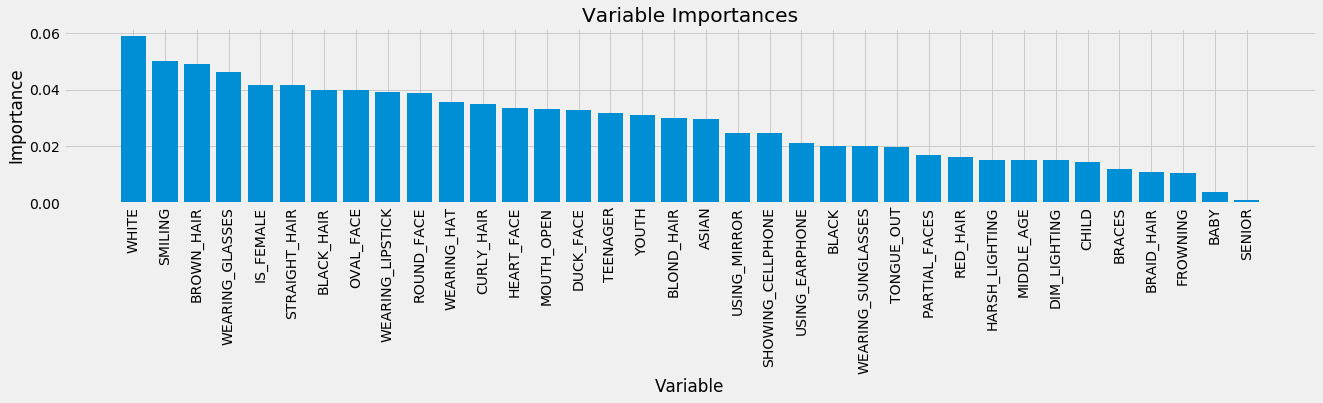

In [54]:
import matplotlib.pyplot as plt

%matplotlib inline

plt.style.use('fivethirtyeight')

plt.figure(figsize=(20, 3))  # width:20, height:3

labelsImportances = [x[1] for x in importances]
valuesImportances = [x[0] for x in importances]

x_values = list(range(len(valuesImportances)))
print(x_values)

plt.bar(x_values, valuesImportances, orientation = 'vertical')

plt.xticks(x_values, labelsImportances, rotation = 'vertical')

plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');